<a href="https://colab.research.google.com/github/manuelcalcada/data-science-for-BPM/blob/master/health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Health Insurance Owners' who will be interested in Vehicle Insurance
#### IND2074

---




# Instalação e importação das bibliotecas necessárias

In [ ]:
!pip install scikit-learn --upgrade #instala o scikit learn
!pip install imblearn --upgrade #instala o imblearn
!pip install seaborn --upgrade #instala o seaborn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)
Requirement already up-to-date: imblearn in /usr/local/lib/python3.6/dist-packages (0.0)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [1]:
#importa os pacotes e funções necessárias
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import seaborn as sn
sn.set_palette("pastel")
sn.set_theme(style='white')

#Importação do dataframe

In [2]:
#importa o dataset do github e grava na variável df_0
df_0 = pd.read_csv('https://raw.githubusercontent.com/manuelcalcada/data-science-for-BPM/master/train.csv')

In [4]:
#imprime as 10 primeiras linhas do dataset
df_0.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
df = df_0.copy() #criando backup de df_0

#Caracterização dos dados

In [6]:
#exibindo as informações do dataset como colunas, tipos e quantidade de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#convertendo variáveis categóricas em objetos (tipo)
df['id'] = df['id'].apply(str) #categórica
df['Region_Code'] = df['Region_Code'].apply(str) #categórica
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].apply(str) #categórica

In [ ]:
#exibindo novamente as informações do dataset como colunas, tipos e quantidade de dados após a conversão
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 34.9+ MB


In [ ]:
#exibindo a quantidade de valores únicos nos dados
print("Valores únicos no df: \n\n{}\n".format(df.nunique()))

Valores únicos no df: 

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64



In [ ]:
#exibindo os dados ausentes do conjunto de dados
print("Valores nulos no df: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos no df: 

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64



In [ ]:
#obtendo estatísticas acerca das colunas Age, Annual_Premium e Vintage
statistics = df[['Age', 'Annual_Premium', 'Vintage']].describe()
statistics.to_excel("statistics.xlsx")  
statistics.head(10)

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [ ]:
#obtendo a quantidade de valores pertencentes a classes dummy Driving_License
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [ ]:
#frequência dos valores acima
df['Driving_License'].value_counts(normalize = True)

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

In [ ]:
#obtendo a quantidade de valores pertencentes a classes dummy Previously_Insured
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [ ]:
#frequência dos valores acima
df['Previously_Insured'].value_counts(normalize = True)

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [ ]:
#obtendo a quantidade de valores pertencentes a classes categorica Vehicle_Age
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
#frequência dos valores acima
df['Vehicle_Age'].value_counts(normalize = True)

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

In [ ]:
#obtendo a quantidade de valores pertencentes a cada classe alvo
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
#frequência dos valores acima
df['Response'].value_counts(normalize = True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

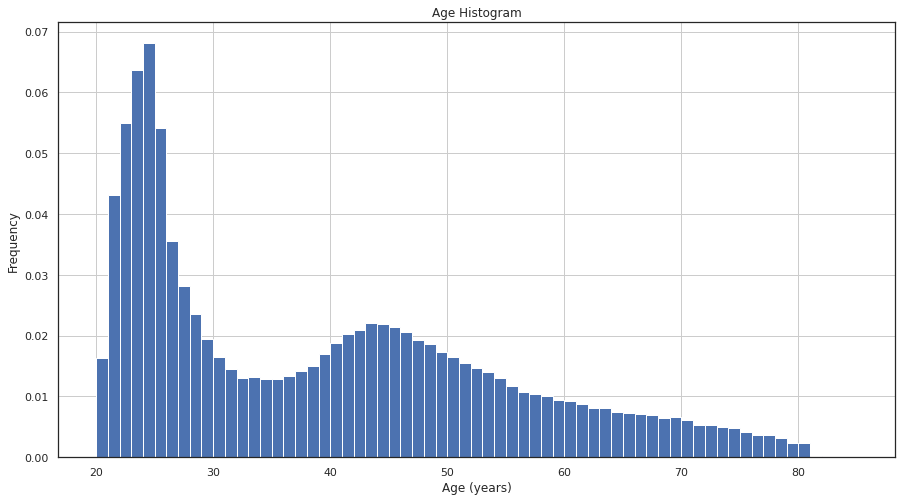

In [ ]:
#histograma da distribuição dos dados da variável numérica Age
df['Age'].hist(figsize=(15,8), bins = 65, density = True)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

In [ ]:
df['Age'].value_counts(normalize = True, bins = 10)

(19.933999999999997, 26.5]    0.335967
(39.5, 46.0]                  0.146328
(26.5, 33.0]                  0.128417
(46.0, 52.5]                  0.101931
(33.0, 39.5]                  0.085212
(52.5, 59.0]                  0.079416
(59.0, 65.5]                  0.049078
(65.5, 72.0]                  0.043961
(72.0, 78.5]                  0.024565
(78.5, 85.0]                  0.005125
Name: Age, dtype: float64

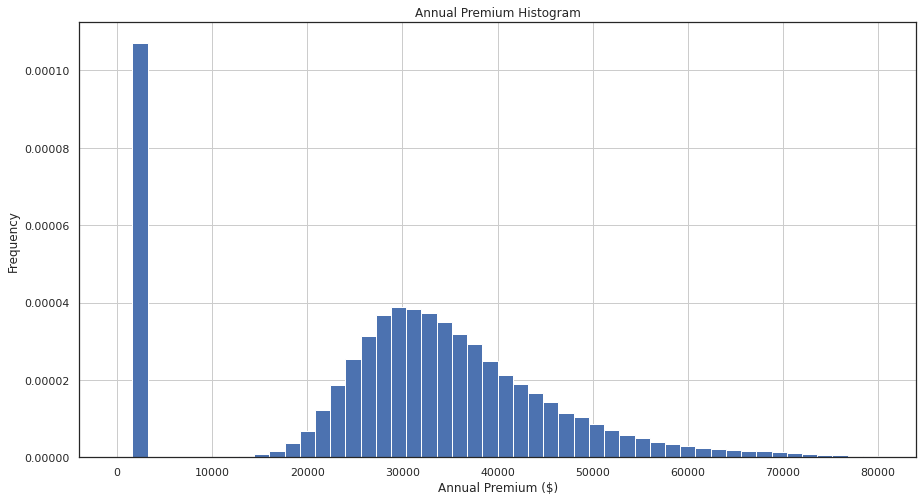

In [ ]:
#histograma da distribuição dos dados da variável numérica Annual_Premium
df['Annual_Premium'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.title('Annual Premium Histogram')
plt.show()

In [ ]:
df['Annual_Premium'].value_counts(normalize = True, bins = 50)

(24131.4, 34882.1]      0.372187
(34882.1, 45632.8]      0.250768
(2092.464, 13380.7]     0.170534
(45632.8, 56383.5]      0.088507
(13380.7, 24131.4]      0.073286
(56383.5, 67134.2]      0.027617
(67134.2, 77884.9]      0.010000
(77884.9, 88635.6]      0.003293
(88635.6, 99386.3]      0.001690
(99386.3, 110137.0]     0.000853
(110137.0, 120887.7]    0.000415
(120887.7, 131638.4]    0.000184
(131638.4, 142389.1]    0.000129
(163890.5, 174641.2]    0.000063
(142389.1, 153139.8]    0.000063
(153139.8, 163890.5]    0.000050
(228394.7, 239145.4]    0.000034
(335901.7, 346652.4]    0.000034
(292898.9, 303649.6]    0.000031
(174641.2, 185391.9]    0.000026
(303649.6, 314400.3]    0.000026
(206893.3, 217644.0]    0.000026
(196142.6, 206893.3]    0.000024
(185391.9, 196142.6]    0.000021
(217644.0, 228394.7]    0.000018
(282148.2, 292898.9]    0.000016
(249896.1, 260646.8]    0.000016
(239145.4, 249896.1]    0.000013
(529414.3, 540165.0]    0.000010
(357403.1, 368153.8]    0.000010
(260646.8,

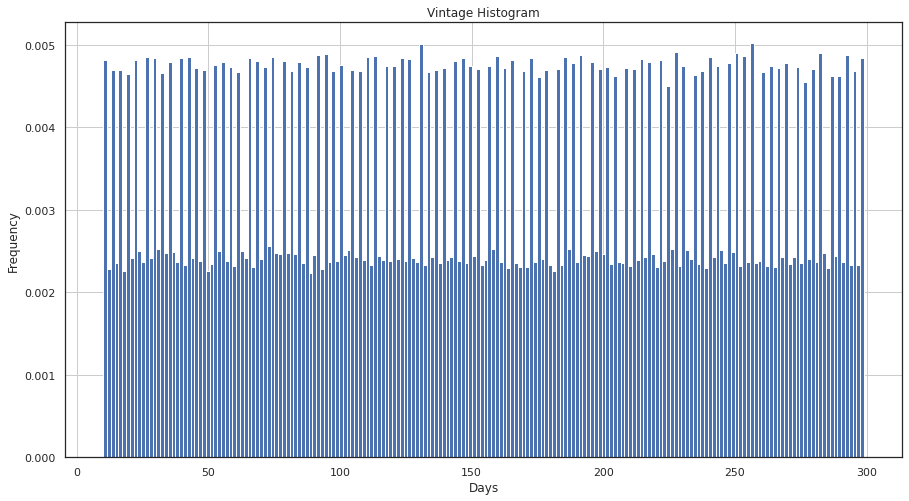

In [ ]:
#histograma da distribuição dos dados da variável numérica Vintage
df['Vintage'].hist(figsize=(15,8), bins = 200, density = True)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Vintage Histogram')
plt.show()

In [ ]:
df['Vintage'].value_counts(normalize = True, bins = 10)

(67.8, 96.7]      0.100748
(241.2, 270.1]    0.100446
(96.7, 125.6]     0.100268
(9.71, 38.9]      0.100139
(125.6, 154.5]    0.100105
(183.4, 212.3]    0.100103
(212.3, 241.2]    0.099919
(38.9, 67.8]      0.099803
(270.1, 299.0]    0.099292
(154.5, 183.4]    0.099176
Name: Vintage, dtype: float64

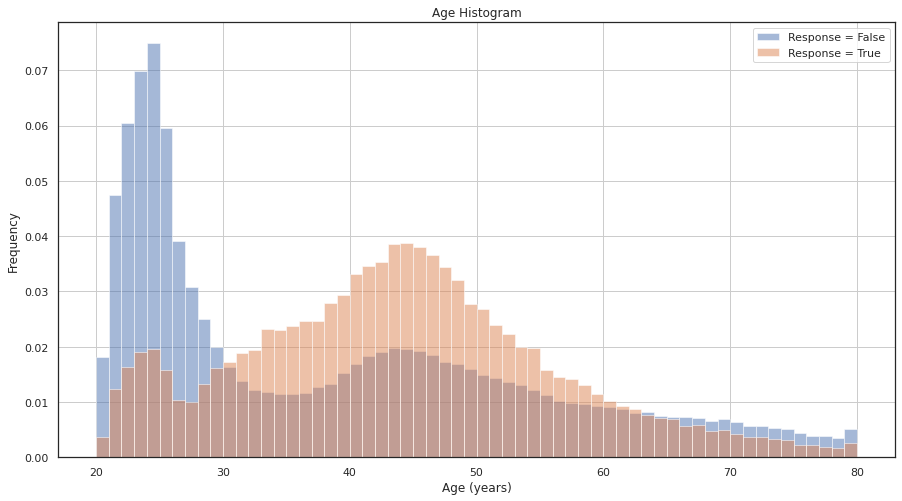

In [ ]:
#histograma de Age agrupado pela classe
df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = False', 'Response = True'])
plt.show()

In [ ]:
df.groupby('Response').Age.value_counts(normalize = True, bins = 10)

Response                            
0         (19.933999999999997, 26.5]    0.369346
          (39.5, 46.0]                  0.131140
          (26.5, 33.0]                  0.129833
          (46.0, 52.5]                  0.092784
          (33.0, 39.5]                  0.075661
          (52.5, 59.0]                  0.075311
          (59.0, 65.5]                  0.048968
          (65.5, 72.0]                  0.045526
          (72.0, 78.5]                  0.025963
          (78.5, 85.0]                  0.005467
1         (38.9, 45.2]                  0.247955
          (45.2, 51.5]                  0.181696
          (32.6, 38.9]                  0.147377
          (51.5, 57.8]                  0.106508
          (19.936, 26.3]                0.097003
          (26.3, 32.6]                  0.095055
          (57.8, 64.1]                  0.067459
          (64.1, 70.4]                  0.032413
          (70.4, 76.7]                  0.018347
          (76.7, 83.0]          

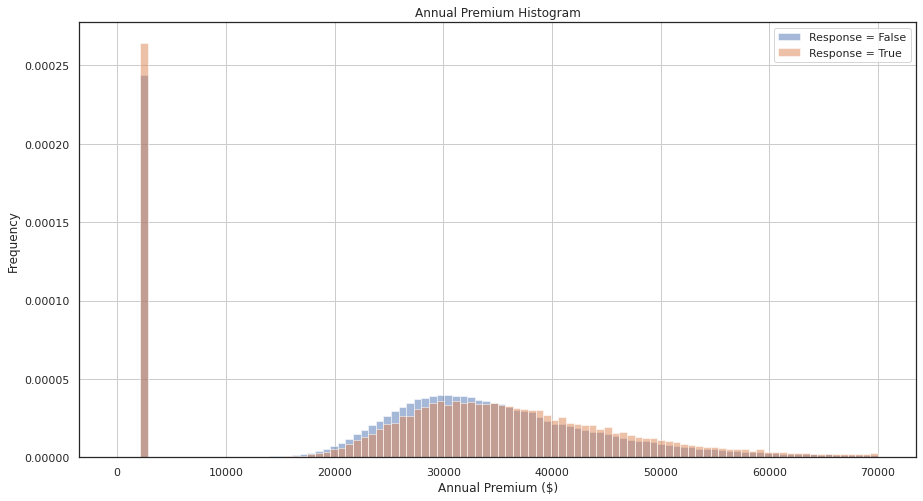

In [ ]:
#histograma de Annual Premium agrupado pela classe
df.groupby('Response').Annual_Premium.hist(range=[0, 70000], align = 'mid', bins=100, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.title('Annual Premium Histogram')
plt.legend(['Response = False', 'Response = True'])
plt.show()

In [ ]:
df.groupby('Response').Annual_Premium.value_counts(normalize = True, bins = 20)

Response                       
0         (29506.75, 56383.5]      0.534930
          (2092.464, 29506.75]     0.421864
          (56383.5, 83260.25]      0.038266
          (83260.25, 110137.0]     0.003726
          (110137.0, 137013.75]    0.000655
          (137013.75, 163890.5]    0.000158
          (163890.5, 190767.25]    0.000105
          (190767.25, 217644.0]    0.000060
          (217644.0, 244520.75]    0.000057
          (298274.25, 325151.0]    0.000045
          (325151.0, 352027.75]    0.000042
          (271397.5, 298274.25]    0.000033
          (244520.75, 271397.5]    0.000015
          (352027.75, 378904.5]    0.000012
          (378904.5, 405781.25]    0.000012
          (513288.25, 540165.0]    0.000009
          (486411.5, 513288.25]    0.000006
          (432658.0, 459534.75]    0.000003
          (459534.75, 486411.5]    0.000003
          (405781.25, 432658.0]    0.000000
1         (29506.75, 56383.5]      0.564933
          (2092.464, 29506.75]     0.379533


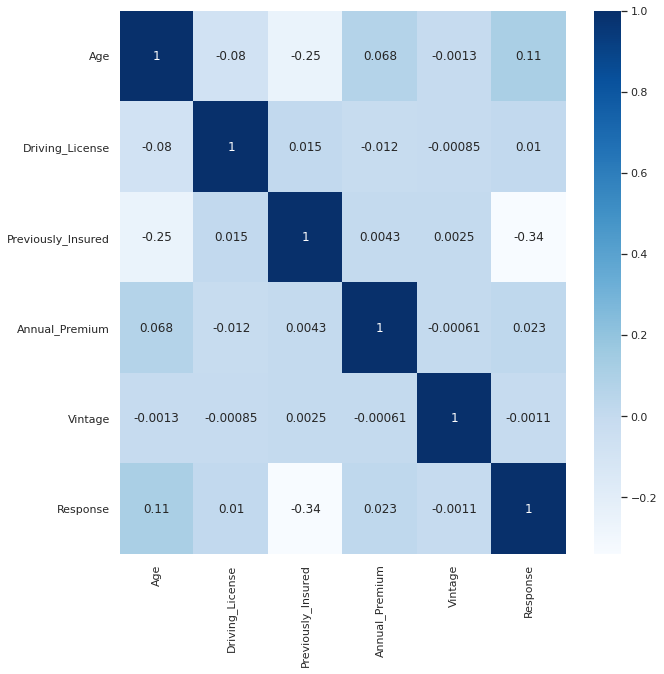

In [ ]:
#matriz de correlação entre as variáveis (excluindo as categóricas)
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True, cmap="Blues")
plt.show()

#Pré-processando o dataset antes do treinamento